# Sistemas Multimedia

## Comparing quantizer in subbands

### Global Configuration

1. Creación de las carpetas:
<br>
Se han creado las carpetas necesarias según el GOP y los distintos valores de q_step

In [1]:
!sudo rm -r /tmp/*
q_step=32  
predictor=2  
valores_q_step = [8,16,20,50,100,150,200,400,512,1028] 
tipos_cuantificacion = ["deadzone"]
gop_sizes = [1]


for gop in gop_sizes:
    !mkdir /tmp/{gop}/
    for q_step in valores_q_step:
        !mkdir /tmp/{gop}/{q_step} && mkdir /tmp/{gop}/{q_step}/original  &&  cp sequences/stockholm/* /tmp/{gop}/{q_step}/original/ 2>&1
        !mkdir /tmp/{gop}/{q_step}/mcdwt && cp /tmp/{gop}/{q_step}/original/* /tmp/{gop}/{q_step}/mcdwt/ 2>&1
        !cd src/ && python3 -O MDWT.py -p /tmp/{gop}/{q_step}/mcdwt/ -N 2
        !cd src/ && python3 -O MCDWT.py -P {predictor} -p /tmp/{gop}/{q_step}/mcdwt/ -T {gop} -N 1
     

2. Uso MCDWT y MDWT
<br>
Para cada valor de q_step y cada banda de la imagen

In [2]:
andas = ["LL","LH","HL","HH"]
imgs=[2]

for gop in gop_sizes:  
    for q_step in valores_q_step:
        !mkdir /tmp/{gop}/{q_step}/cuantificadas/ 
        for tipo in tipos_cuantificacion:
            for imagen in [0,1]: 
                ii ="{:03d}".format(imagen)
                !mkdir /tmp/{gop}/{q_step}/cuantificadas/{imagen}/ 
                for banda in bandas:
                    !mkdir /tmp/{gop}/{q_step}/cuantificadas/{imagen}/{banda}/ 
                    !cp /tmp/{gop}/{q_step}/mcdwt/* /tmp/{gop}/{q_step}/cuantificadas/{imagen}/{banda}/ 
                    !python3 tools/quantize.py -t {tipo} -i /tmp/{gop}/{q_step}/mcdwt/{banda}{ii}.png -o /tmp/{gop}/{q_step}/cuantificadas/{imagen}/{banda}/{banda}{ii}.png -q {q_step}  
                    !mkdir /tmp/{gop}/{q_step}/cuantificadas/{imagen}/{banda}/inversas  &&  cp /tmp/{gop}/{q_step}/cuantificadas/{imagen}/{banda}/* /tmp/{gop}/{q_step}/cuantificadas/{imagen}/{banda}/inversas  
                    !cd src/ && python3 -O MCDWT.py -P {predictor} -p /tmp/{gop}/{q_step}/cuantificadas/{imagen}/{banda}/inversas/ -b  -N 1
                    !cd src/ && python3 -O MDWT.py -p /tmp/{gop}/{q_step}/cuantificadas/{imagen}/{banda}/inversas/ -b  -N 2

cp: -r not specified; omitting directory '/tmp/1/8/cuantificadas/0/LL/inversas'
cp: -r not specified; omitting directory '/tmp/1/8/cuantificadas/0/LH/inversas'
cp: -r not specified; omitting directory '/tmp/1/8/cuantificadas/0/HL/inversas'
cp: -r not specified; omitting directory '/tmp/1/8/cuantificadas/0/HH/inversas'
cp: -r not specified; omitting directory '/tmp/1/8/cuantificadas/1/LL/inversas'
cp: -r not specified; omitting directory '/tmp/1/8/cuantificadas/1/LH/inversas'
cp: -r not specified; omitting directory '/tmp/1/8/cuantificadas/1/HL/inversas'
cp: -r not specified; omitting directory '/tmp/1/8/cuantificadas/1/HH/inversas'
cp: -r not specified; omitting directory '/tmp/1/16/cuantificadas/0/LL/inversas'
cp: -r not specified; omitting directory '/tmp/1/16/cuantificadas/0/LH/inversas'
cp: -r not specified; omitting directory '/tmp/1/16/cuantificadas/0/HL/inversas'
cp: -r not specified; omitting directory '/tmp/1/16/cuantificadas/0/HH/inversas'
cp: -r not specified; omitting direc

In [3]:
from suma import Sumando
try:
    import matplotlib.pyplot as plt
except:
    os.system("pip3 install matplotlib --user")
    import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

resultado_total = {"LL" : [],"LH" : [],"HL" : [],"HH" : []}

gops = {}
resultado = {}
s = Sumando()
for gop in [1]:
    for imagen in range(0,2**gop):
        gops[imagen] = {"LL" : [],"LH" : [],"HL" : [],"HH" : []}
        ii ="{:03d}".format(imagen)
        for q_step in valores_q_step: 
            diccionario = {}
            for tipo in tipos_cuantificacion:
                for banda in ["LL", "LH", "HL", "HH"]:
                    pesos = s.GetPesosSubbandasGOP(str(tipo), str(q_step),banda,imagen,gop)
                    MSE = 0.0
                    MSE += s.GetMSEGOP(tipo,imagen,q_step,banda,gop)
                    gops[imagen][banda].append([pesos,MSE]) 
    resultado[gop] = gops
     
                    
print(resultado_total)
print(resultado[1])

diccionario = resultado[1]


{'LL': [], 'LH': [], 'HL': [], 'HH': []}
{0: {'LL': [[2458322.0, 6.529197523328993], [2351723.0, 20.56881069607205], [2334072.0, 30.661195543077255], [2196583.0, 174.18822089301216], [2101462.0, 677.4054494222005], [2053934.0, 1552.7510297987196], [2002719.0, 2767.9280765109593], [1959322.0, 7764.602064683702], [1938038.0, 9916.221664428711], [1936996.0, 9995.94170498318]], 'LH': [[2278931.0, 4.519984605577257], [2106466.0, 11.015995619032118], [2078629.0, 14.048587375217014], [2042248.0, 25.97590094672309], [2037646.0, 31.987640380859375], [2037463.0, 32.409602864583334], [2037450.0, 32.43697713216146], [2037450.0, 32.43697713216146], [2037450.0, 32.43697713216146], [2037450.0, 32.43697713216146]], 'HL': [[2192226.0, 4.758382161458333], [2063741.0, 9.227001614040798], [2051514.0, 10.596148342556424], [2039699.0, 13.604773627387154], [2039157.0, 13.978275892469618], [2039144.0, 13.981930202907986], [2039144.0, 13.981930202907986], [2039144.0, 13.981930202907986], [2039144.0, 13.981930

### Plotting

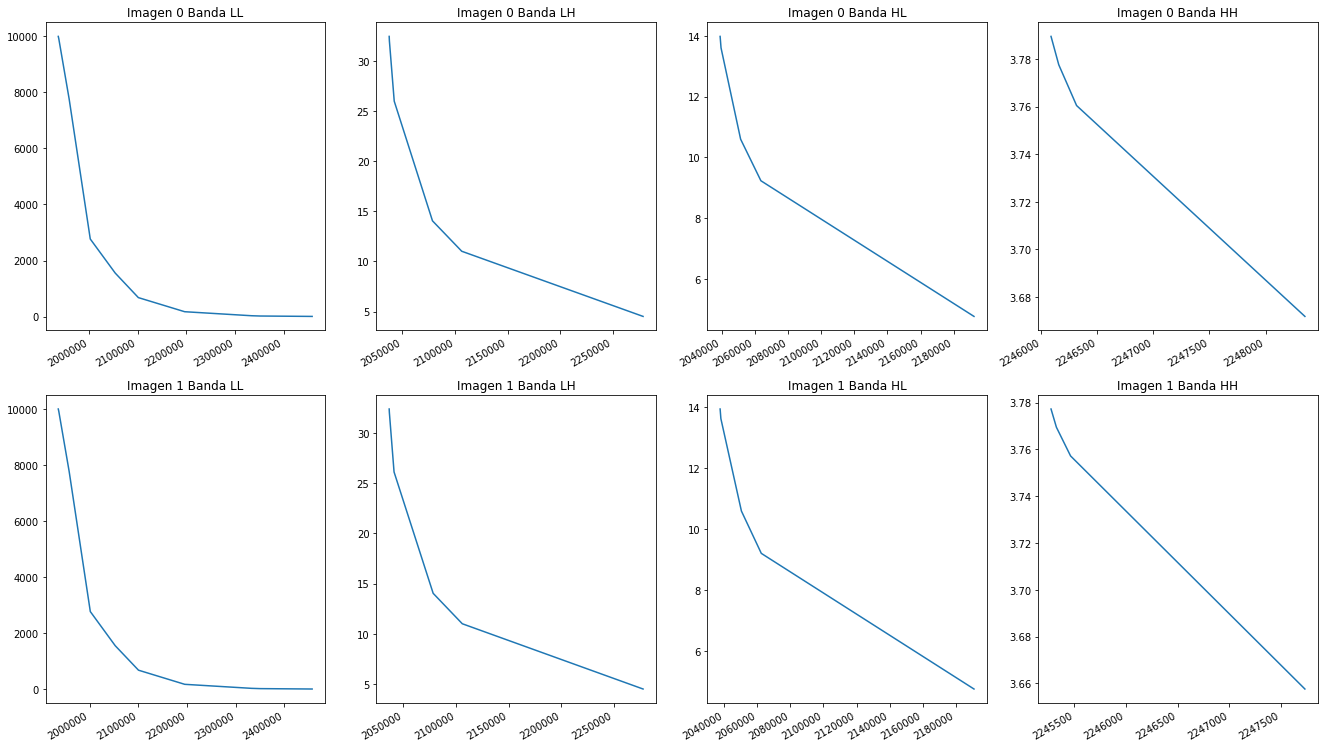

In [4]:
fig, axs = plt.subplots(len(diccionario), 4)
fig.set_size_inches(18.5, 10.5)
plt.subplots_adjust(hspace=0.5)

for imagen in diccionario:
    column = 0
    for banda in diccionario[imagen]:
        axs[imagen, column].plot([i[0] for i in diccionario[imagen][banda]],[i[1] for i in diccionario[imagen][banda]])
        axs[imagen, column].set_title("Imagen "+str(imagen) + " Banda "+banda)
        plt.setp(axs[imagen, column].get_xticklabels(), rotation=30, horizontalalignment='right')
        column+=1
fig.tight_layout()
plt.show()